In [4]:
%load_ext autoreload
%autoreload 2

import os
import subprocess
import sys
import warnings

warnings.simplefilter("ignore", FutureWarning)

import cnv_inference_config
project_config = cnv_inference_config
os.chdir(project_config.MB_ROOT)

from collections import defaultdict, OrderedDict
import multiprocessing as mp
import sys

import numpy as np
import pandas as pd
from tqdm import tqdm, tqdm_notebook

import matplotlib.pyplot as plt
import seaborn as sns

from data_types import ase
import plotlib
import toolkit
import util
import test_phasing
from workspace.workspace_manager import WorkspaceManager

workspace = WorkspaceManager(
    task_name="counts_to_ase",
    experiment_info={"data" : "scDNA"},
    verbose=True
)
workspace.load_workspace()

sns.set()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
clustering_name = 'evo_dist_9_eb'
requirements = ["block_counts"]

data = {
    dtype : 
    util.pickle_load(workspace.tmp_data[dtype])
    for dtype in tqdm_notebook(
        requirements,
        "loading datasets into RAM"
    )
}
data_name = workspace.experiment_info['data']
sample_name = workspace.experiment_info['sample']
print(f"Currently working on {data_name}, {sample_name}")

data[f"{clustering_name}_clustering"] = util.pickle_load(
    f"{workspace.dir}"
    f"/{clustering_name}_clustering.pkl"
)
data[f"{clustering_name}_clustering"].head()


Currently working on scDNA, STP_G&T


,CELL_ID,LABEL,BARCODE
0,A10,5,1
1,A11,1,2
2,A12,1,3
3,A2,2,4
4,A3,5,5


In [6]:
data[f'{clustering_name}_block_counts'] =\
    toolkit.aggregate_by_barcode_groups(
        data["block_counts"], 
        data[f"{clustering_name}_clustering"]
    )
util.pickle_dump(
    data[f'{clustering_name}_block_counts'], 
    f"{workspace.tmp_dir}"
    f"/{clustering_name}_block_counts.pkl"
)
workspace.add_entry(
    f"{clustering_name}_block_counts",
    f'{clustering_name}_block_counts.pkl'
)
data[f'{clustering_name}_block_counts'].head()

,1_ad,1_dp,2_ad,2_dp,3_ad,3_dp,4_ad,4_dp,5_ad,5_dp,6_ad,6_dp,7_ad,7_dp,8_ad,8_dp,9_ad,9_dp
0,814.0,1541.0,596.0,1211.0,304.0,665.0,286.0,569.0,427.0,880.0,351.0,683.0,63.0,194.0,384.0,726.0,234.0,434.0
1,1445.0,2896.0,1233.0,2481.0,668.0,1319.0,682.0,1331.0,769.0,1458.0,571.0,1120.0,323.0,927.0,759.0,1532.0,415.0,745.0
2,378.0,812.0,382.0,711.0,252.0,478.0,221.0,443.0,266.0,510.0,128.0,267.0,66.0,98.0,212.0,458.0,133.0,227.0
3,51.0,101.0,26.0,63.0,21.0,53.0,16.0,32.0,17.0,34.0,18.0,29.0,5.0,6.0,29.0,45.0,8.0,25.0
4,23.0,48.0,23.0,41.0,10.0,16.0,4.0,10.0,5.0,14.0,8.0,17.0,0.0,1.0,12.0,17.0,7.0,10.0


In [7]:
data[f'{clustering_name}_ase'] = ase.compute_ase(
    data[f'{clustering_name}_block_counts'], 
    toolkit.extract_cluster_labels(data[f'{clustering_name}_clustering'])
)
util.pickle_dump(
    data[f'{clustering_name}_ase'], 
    f"{workspace.tmp_dir}"
    f"/{clustering_name}_ase.pkl"
)
workspace.add_entry(
    f"{clustering_name}_ase",
    f'{clustering_name}_ase.pkl'
)

CPU times: user 1min 13s, sys: 8.93 s, total: 1min 22s
Wall time: 1min 15s


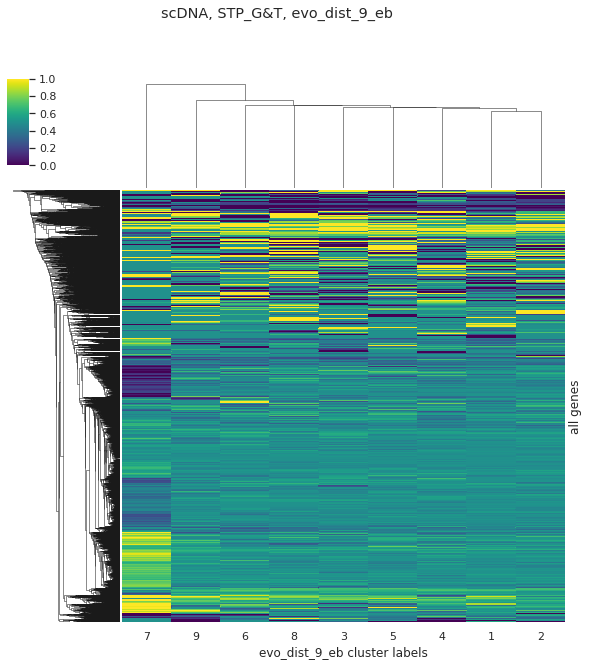

In [9]:
%%time
ase.plot_ase(
    data[f'{clustering_name}_ase'],
    title=f"{data_name}, {sample_name}, {clustering_name}",
    xlabel=f"{clustering_name} cluster labels",
    ylabel="all genes",
    row_cluster=True,
    outfile=f"{workspace.img_dir}/{clustering_name}_ase.pdf"
)

In [10]:
workspace.status()
workspace.verify()
workspace.push()

Staged for commit: 
	-evo_dist_9_eb_block_counts : evo_dist_9_eb_block_counts.pkl
	-evo_dist_9_eb_ase : evo_dist_9_eb_ase.pkl


/icgc/dkfzlsdf/analysis/B260/users/v390v/cnv_inference/data/tmp/counts_to_ase/STP_G&T/scDNA/evo_dist_9_eb_block_counts.pkl —> /icgc/dkfzlsdf/analysis/B260/users/v390v/cnv_inference/data/processed/STP_G&T/scDNA/evo_dist_9_eb_block_counts.pkl
/icgc/dkfzlsdf/analysis/B260/users/v390v/cnv_inference/data/tmp/counts_to_ase/STP_G&T/scDNA/evo_dist_9_eb_ase.pkl —> /icgc/dkfzlsdf/analysis/B260/users/v390v/cnv_inference/data/processed/STP_G&T/scDNA/evo_dist_9_eb_ase.pkl
